# Functional API

In [1]:
import tensorflow as tf
from tensorflow.keras import layers

## 范例1. 简单模型语法

In [2]:
# Functional API 

# 建立第一层 InputTensor
InputTensor = layers.Input(shape=(100,))

# H1 接在 InputTensor 后面
H1 = layers.Dense(10, activation='relu')(InputTensor)

# H2 接在 H1 后面
H2 = layers.Dense(20, activation='relu')(H1)

# Output 接在 H2 后面
Output = layers.Dense(1, activation='softmax')(H2)

# 建立模型，必须指定 inputs / outputs
model = tf.keras.Model(inputs=InputTensor, outputs=Output)

# 显示模型汇总资讯
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense (Dense)                (None, 10)                1010      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 1,251
Trainable params: 1,251
Non-trainable params: 0
_________________________________________________________________


## 范例2. 再看一个实际的模型，以下包括3个input、2个output

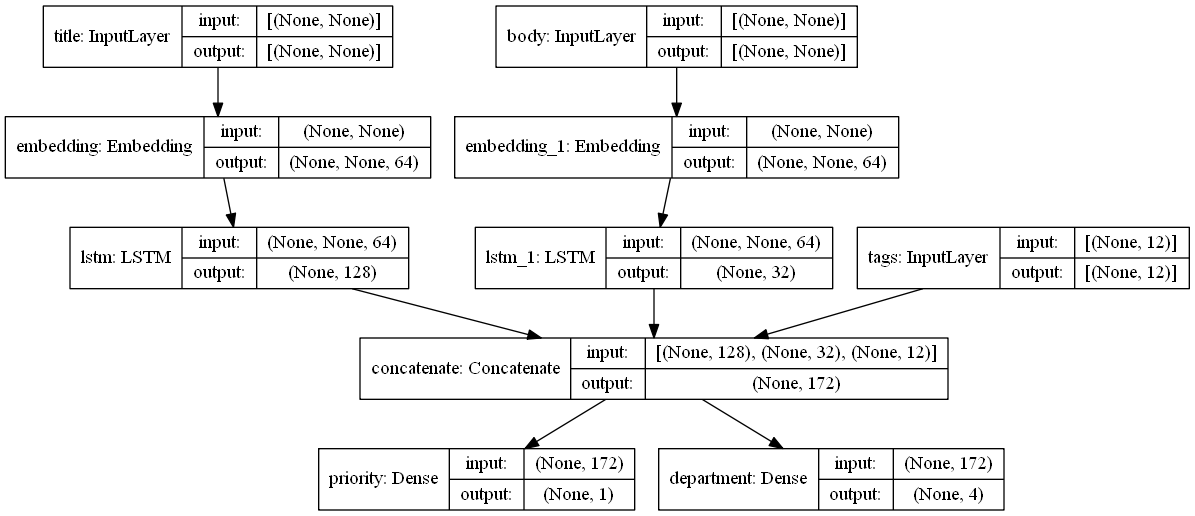

In [3]:
# 设定变数
num_tags = 12  # tags 数目
num_words = 10000  # vocabulary 字数
num_departments = 4  # departments 数目

# 建立第一层 InputTensor
title_input = tf.keras.Input(shape=(None,), name="title")  
body_input = tf.keras.Input(shape=(None,), name="body")  
tags_input = tf.keras.Input(shape=(num_tags,), name="tags")  

# 建立第二层 
title_features = layers.Embedding(num_words, 64)(title_input)
body_features = layers.Embedding(num_words, 64)(body_input)

# 建立第三层 
title_features = layers.LSTM(128)(title_features)
body_features = layers.LSTM(32)(body_features)

# 合并以上神经层
x = layers.concatenate([title_features, body_features, tags_input])

# 建立第四层，连接合并的 x
priority_pred = layers.Dense(1, name="priority")(x)
department_pred = layers.Dense(num_departments, name="department")(x)

# 建立模型，必须指定 inputs / outputs
model = tf.keras.Model(
    inputs=[title_input, body_input, tags_input],
    outputs=[priority_pred, department_pred],
)

# 绘制模型
# show_shapes=True：Layer 含 Input/Output 资讯
tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", 
                          show_shapes=True)